In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [8]:
df = df.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


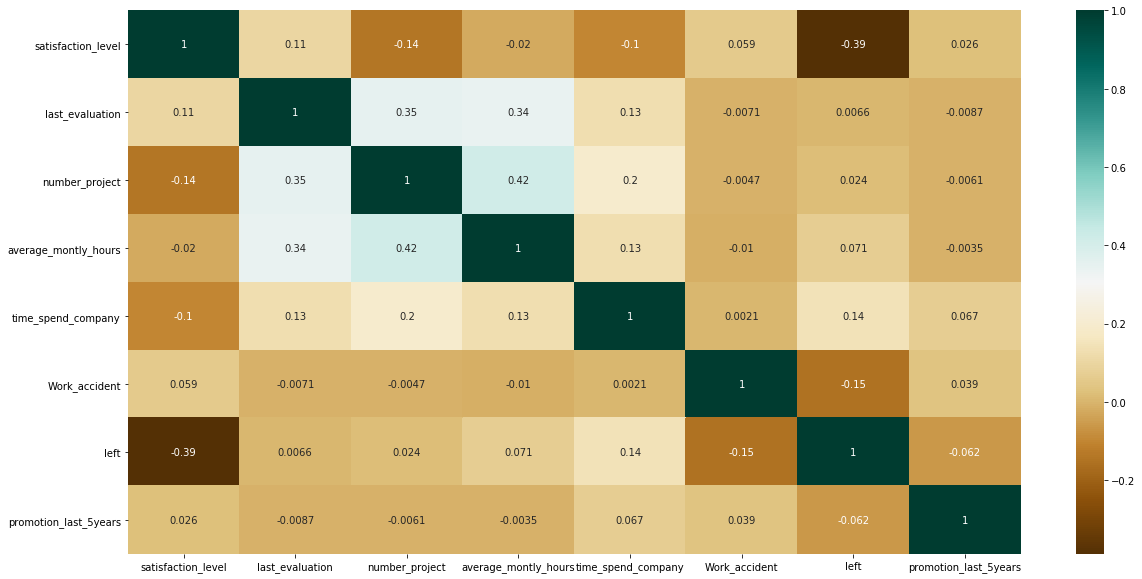

In [11]:
# Finding the relations between the variables.
import seaborn as sns
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [14]:
import altair as alt

In [16]:
df_small = df.head(5000)

In [18]:
bar = alt.Chart(df_small).mark_bar().encode(
    alt.Y('last_evaluation'),
    alt.X('number_project', title='Anno'),
    tooltip=[alt.Tooltip('number_project', title='Anno'), alt.Tooltip('last_evaluation', format=',', title='Immatricolazioni')]     
)
bar

alt.Chart(...)

In [31]:
X = df.drop(['satisfaction_level','promotion_last_5years','Work_accident','salary','Department','left'],axis='columns')

In [32]:
y = df.left

In [33]:
from sklearn import linear_model

In [34]:
logReg = linear_model.LogisticRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [66]:
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logReg.predict([[0.52,2,159,3]])

array([0], dtype=int64)

In [82]:
logReg.predict(X_test[3000:3050])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [83]:
logReg.score(X_test,y_test)

0.7432

In [85]:
#taking salary as another feature
df_1 = pd.get_dummies(df.salary)

In [86]:
df_1.head(5)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [89]:
df_2 = pd.concat([df,df_1], axis = 'columns')
df_2.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,0,1,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,0,1,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,0,1,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,0,1,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,0,1,0


In [115]:
final = df_2.drop(['promotion_last_5years','Work_accident','time_spend_company','salary','Department','left','medium'],axis='columns')
final.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,high,low
0,0.38,0.53,2,157,0,1
1,0.80,0.86,5,262,0,0
2,0.11,0.88,7,272,0,0
3,0.72,0.87,5,223,0,1
4,0.37,0.52,2,159,0,1
5,0.41,0.50,2,153,0,1
6,0.10,0.77,6,247,0,1
7,0.92,0.85,5,259,0,1
8,0.89,1.00,5,224,0,1
9,0.42,0.53,2,142,0,1


In [116]:
X_new = final
y_new = df.left

In [117]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.20)

In [118]:
logReg.fit(X_new_train,y_new_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
logReg.predict(X_new_test[100:200])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
logReg.score(X_new_test,y_new_test)

0.8023333333333333

In [121]:
#save the model
import pickle

In [122]:
with open('model_hr','wb') as f:
    pickle.dump(logReg,f)

In [123]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [125]:
mp.predict([[0.38,0.53,2,157,0,1]])

array([1], dtype=int64)